## <font color=purple> **NBL DATA FROM 2016/2017**
##### **Eric Nesi**
##### All Code in Python 3

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegressionCV, LogisticRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import GridSearchCV, cross_val_score


plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Part 1:
#### Discussion:
Taking player data and calculating total stats for each team.

In [23]:
#Load in different dataset. Counting stats for the year. CSV taken from http://www.nbl.com.au/stats-central/.
nbl_totals = pd.read_csv('/Users/ericnesi/Desktop/capstone-eric-pub/datasets/NBL_Player_Data.csv')

In [24]:
nbl_totals.head()

,Player,Team,Games,Min,PTS,FGM,FGA,FG%,2PM,2PA,...,FTA,FT%,OR,DR,TR,AS,TO,ST,BL,PFS
0,Adam Doyle,Adelaide 36ers,21,134.90,44,15,38,39.5,11,22,...,13,76.9,2,9,11,17,12,4,0,12
1,Adam Gibson,Brisbane Bullets,21,613.76,206,70,153,45.8,37,73,...,35,94.3,11,43,54,79,33,21,4,60
2,Akil Mitchell,New Zealand Breakers,25,568.47,238,105,189,55.6,103,186,...,79,32.9,49,130,179,53,48,22,11,66
3,Aleks Maric,Sydney Kings,28,496.75,150,60,101,59.4,60,101,...,58,51.7,56,75,131,34,46,32,19,90
4,Alex Loughton,Cairns Taipans,26,455.83,172,66,145,45.5,41,84,...,21,71.4,23,54,77,32,17,11,3,49


In [25]:
#Make new Dataframe that is just team totals
totals_team = nbl_totals.copy()

In [26]:
totals_team.head()

,Player,Team,Games,Min,PTS,FGM,FGA,FG%,2PM,2PA,...,FTA,FT%,OR,DR,TR,AS,TO,ST,BL,PFS
0,Adam Doyle,Adelaide 36ers,21,134.90,44,15,38,39.5,11,22,...,13,76.9,2,9,11,17,12,4,0,12
1,Adam Gibson,Brisbane Bullets,21,613.76,206,70,153,45.8,37,73,...,35,94.3,11,43,54,79,33,21,4,60
2,Akil Mitchell,New Zealand Breakers,25,568.47,238,105,189,55.6,103,186,...,79,32.9,49,130,179,53,48,22,11,66
3,Aleks Maric,Sydney Kings,28,496.75,150,60,101,59.4,60,101,...,58,51.7,56,75,131,34,46,32,19,90
4,Alex Loughton,Cairns Taipans,26,455.83,172,66,145,45.5,41,84,...,21,71.4,23,54,77,32,17,11,3,49


In [27]:
#Drop player column
totals_team = totals_team.drop('Player', axis=1)

In [28]:
totals_team.head(1)

,Team,Games,Min,PTS,FGM,FGA,FG%,2PM,2PA,2P%,...,FTA,FT%,OR,DR,TR,AS,TO,ST,BL,PFS
0,Adelaide 36ers,21,134.9,44,15,38,39.5,11,22,50.0,...,13,76.9,2,9,11,17,12,4,0,12


In [29]:
#column titles
totals_team.columns

Index(['Team', 'Games', 'Min', 'PTS', 'FGM', 'FGA', 'FG%', '2PM', '2PA', '2P%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OR', 'DR', 'TR', 'AS', 'TO',
       'ST', 'BL', 'PFS'],
      dtype='object')

In [30]:
#groupby sum/mean stats
totals_team = totals_team.groupby('Team').agg({'Games': np.max,'Min': np.sum,'PTS': np.sum, 'FGM': np.sum, 
                                                 'FG%': np.mean,'FGA': np.sum, '2PM': np.sum, '2PA': np.sum,
                                                  '2P%': np.mean,'3PM': np.sum, '3PA': np.sum,'3P%': np.mean,
                                                 'FTM': np.sum, 'FTA': np.sum, 'FT%': np.mean, 'OR': np.sum, 
                                                 'DR': np.sum, 'TR': np.sum, 'AS': np.sum, 'TO': np.sum,
                                                  'ST': np.sum, 'BL': np.sum, 'PFS': np.sum}) 

In [31]:
totals_team.head(8)

,Games,Min,PTS,FGM,FG%,FGA,2PM,2PA,2P%,3PM,...,FTA,FT%,OR,DR,TR,AS,TO,ST,BL,PFS
Team,,,,,,,,,,,,,,,,,,,,,
Adelaide 36ers,31,6250.05,2867,1003,40.446154,2154,785,1540,42.646154,218,...,863,60.876923,363,827,1190,535,442,174,86,645
Brisbane Bullets,28,5649.68,2268,814,35.681250,1768,640,1279,39.025000,174,...,579,66.906250,294,638,932,423,430,145,81,650
Cairns Taipans,30,6034.22,2440,847,34.420000,1955,574,1195,37.740000,273,...,603,63.180000,281,651,932,513,368,190,61,621
Illawarra Hawks,34,6825.15,3010,1053,43.407692,2353,742,1472,44.800000,311,...,779,76.207692,344,773,1117,667,453,287,119,724
Melbourne United,28,5610.32,2345,851,40.575000,1941,585,1173,44.112500,266,...,528,60.018750,276,673,949,422,288,168,78,553
New Zealand Breakers,28,5642.27,2353,852,40.152941,1859,597,1187,42.435294,255,...,572,65.017647,304,757,1061,499,445,161,92,642
Perth Wildcats,33,6699.64,2732,977,39.952941,2223,739,1515,42.894118,238,...,739,53.894118,392,772,1164,550,427,225,104,697
Sydney Kings,28,5599.99,2295,808,37.423529,1856,577,1159,41.611765,231,...,579,58.135294,272,628,900,473,323,214,111,598


In [32]:
#Effective Field Goal Percentage which accounts for a 3pt being worth more than 2pt
totals_team['EFG%'] = (totals_team['FGM'] + (.5 * totals_team['3PM'])) / totals_team['FGA']

In [33]:
totals_team.head(8)

,Games,Min,PTS,FGM,FG%,FGA,2PM,2PA,2P%,3PM,...,FT%,OR,DR,TR,AS,TO,ST,BL,PFS,EFG%
Team,,,,,,,,,,,,,,,,,,,,,
Adelaide 36ers,31,6250.05,2867,1003,40.446154,2154,785,1540,42.646154,218,...,60.876923,363,827,1190,535,442,174,86,645,0.516249
Brisbane Bullets,28,5649.68,2268,814,35.681250,1768,640,1279,39.025000,174,...,66.906250,294,638,932,423,430,145,81,650,0.509615
Cairns Taipans,30,6034.22,2440,847,34.420000,1955,574,1195,37.740000,273,...,63.180000,281,651,932,513,368,190,61,621,0.503069
Illawarra Hawks,34,6825.15,3010,1053,43.407692,2353,742,1472,44.800000,311,...,76.207692,344,773,1117,667,453,287,119,724,0.513600
Melbourne United,28,5610.32,2345,851,40.575000,1941,585,1173,44.112500,266,...,60.018750,276,673,949,422,288,168,78,553,0.506955
New Zealand Breakers,28,5642.27,2353,852,40.152941,1859,597,1187,42.435294,255,...,65.017647,304,757,1061,499,445,161,92,642,0.526896
Perth Wildcats,33,6699.64,2732,977,39.952941,2223,739,1515,42.894118,238,...,53.894118,392,772,1164,550,427,225,104,697,0.493027
Sydney Kings,28,5599.99,2295,808,37.423529,1856,577,1159,41.611765,231,...,58.135294,272,628,900,473,323,214,111,598,0.497575


In [34]:
#figure out total of EFG&
total = totals_team['EFG%'].mean()
print(total)

0.5083733959521314


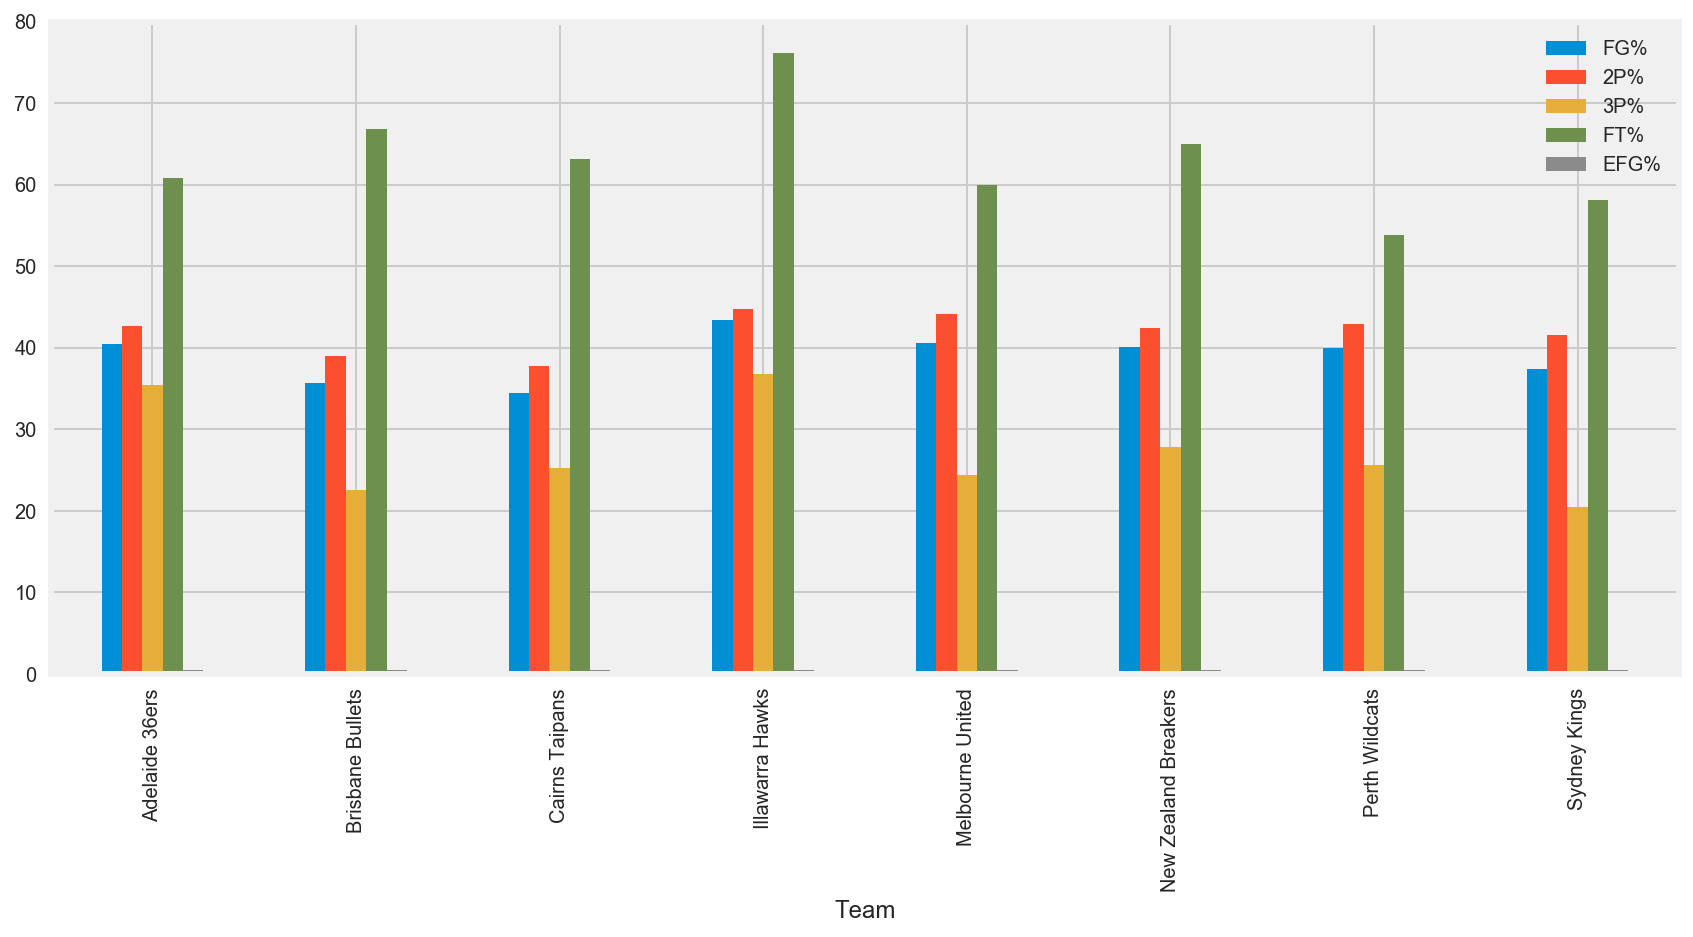

In [35]:
#Some quick graphs
Percentages = totals_team[['FG%', '2P%', '3P%', 'FT%', 'EFG%']]
Percentages.plot.bar(figsize=(13, 6))

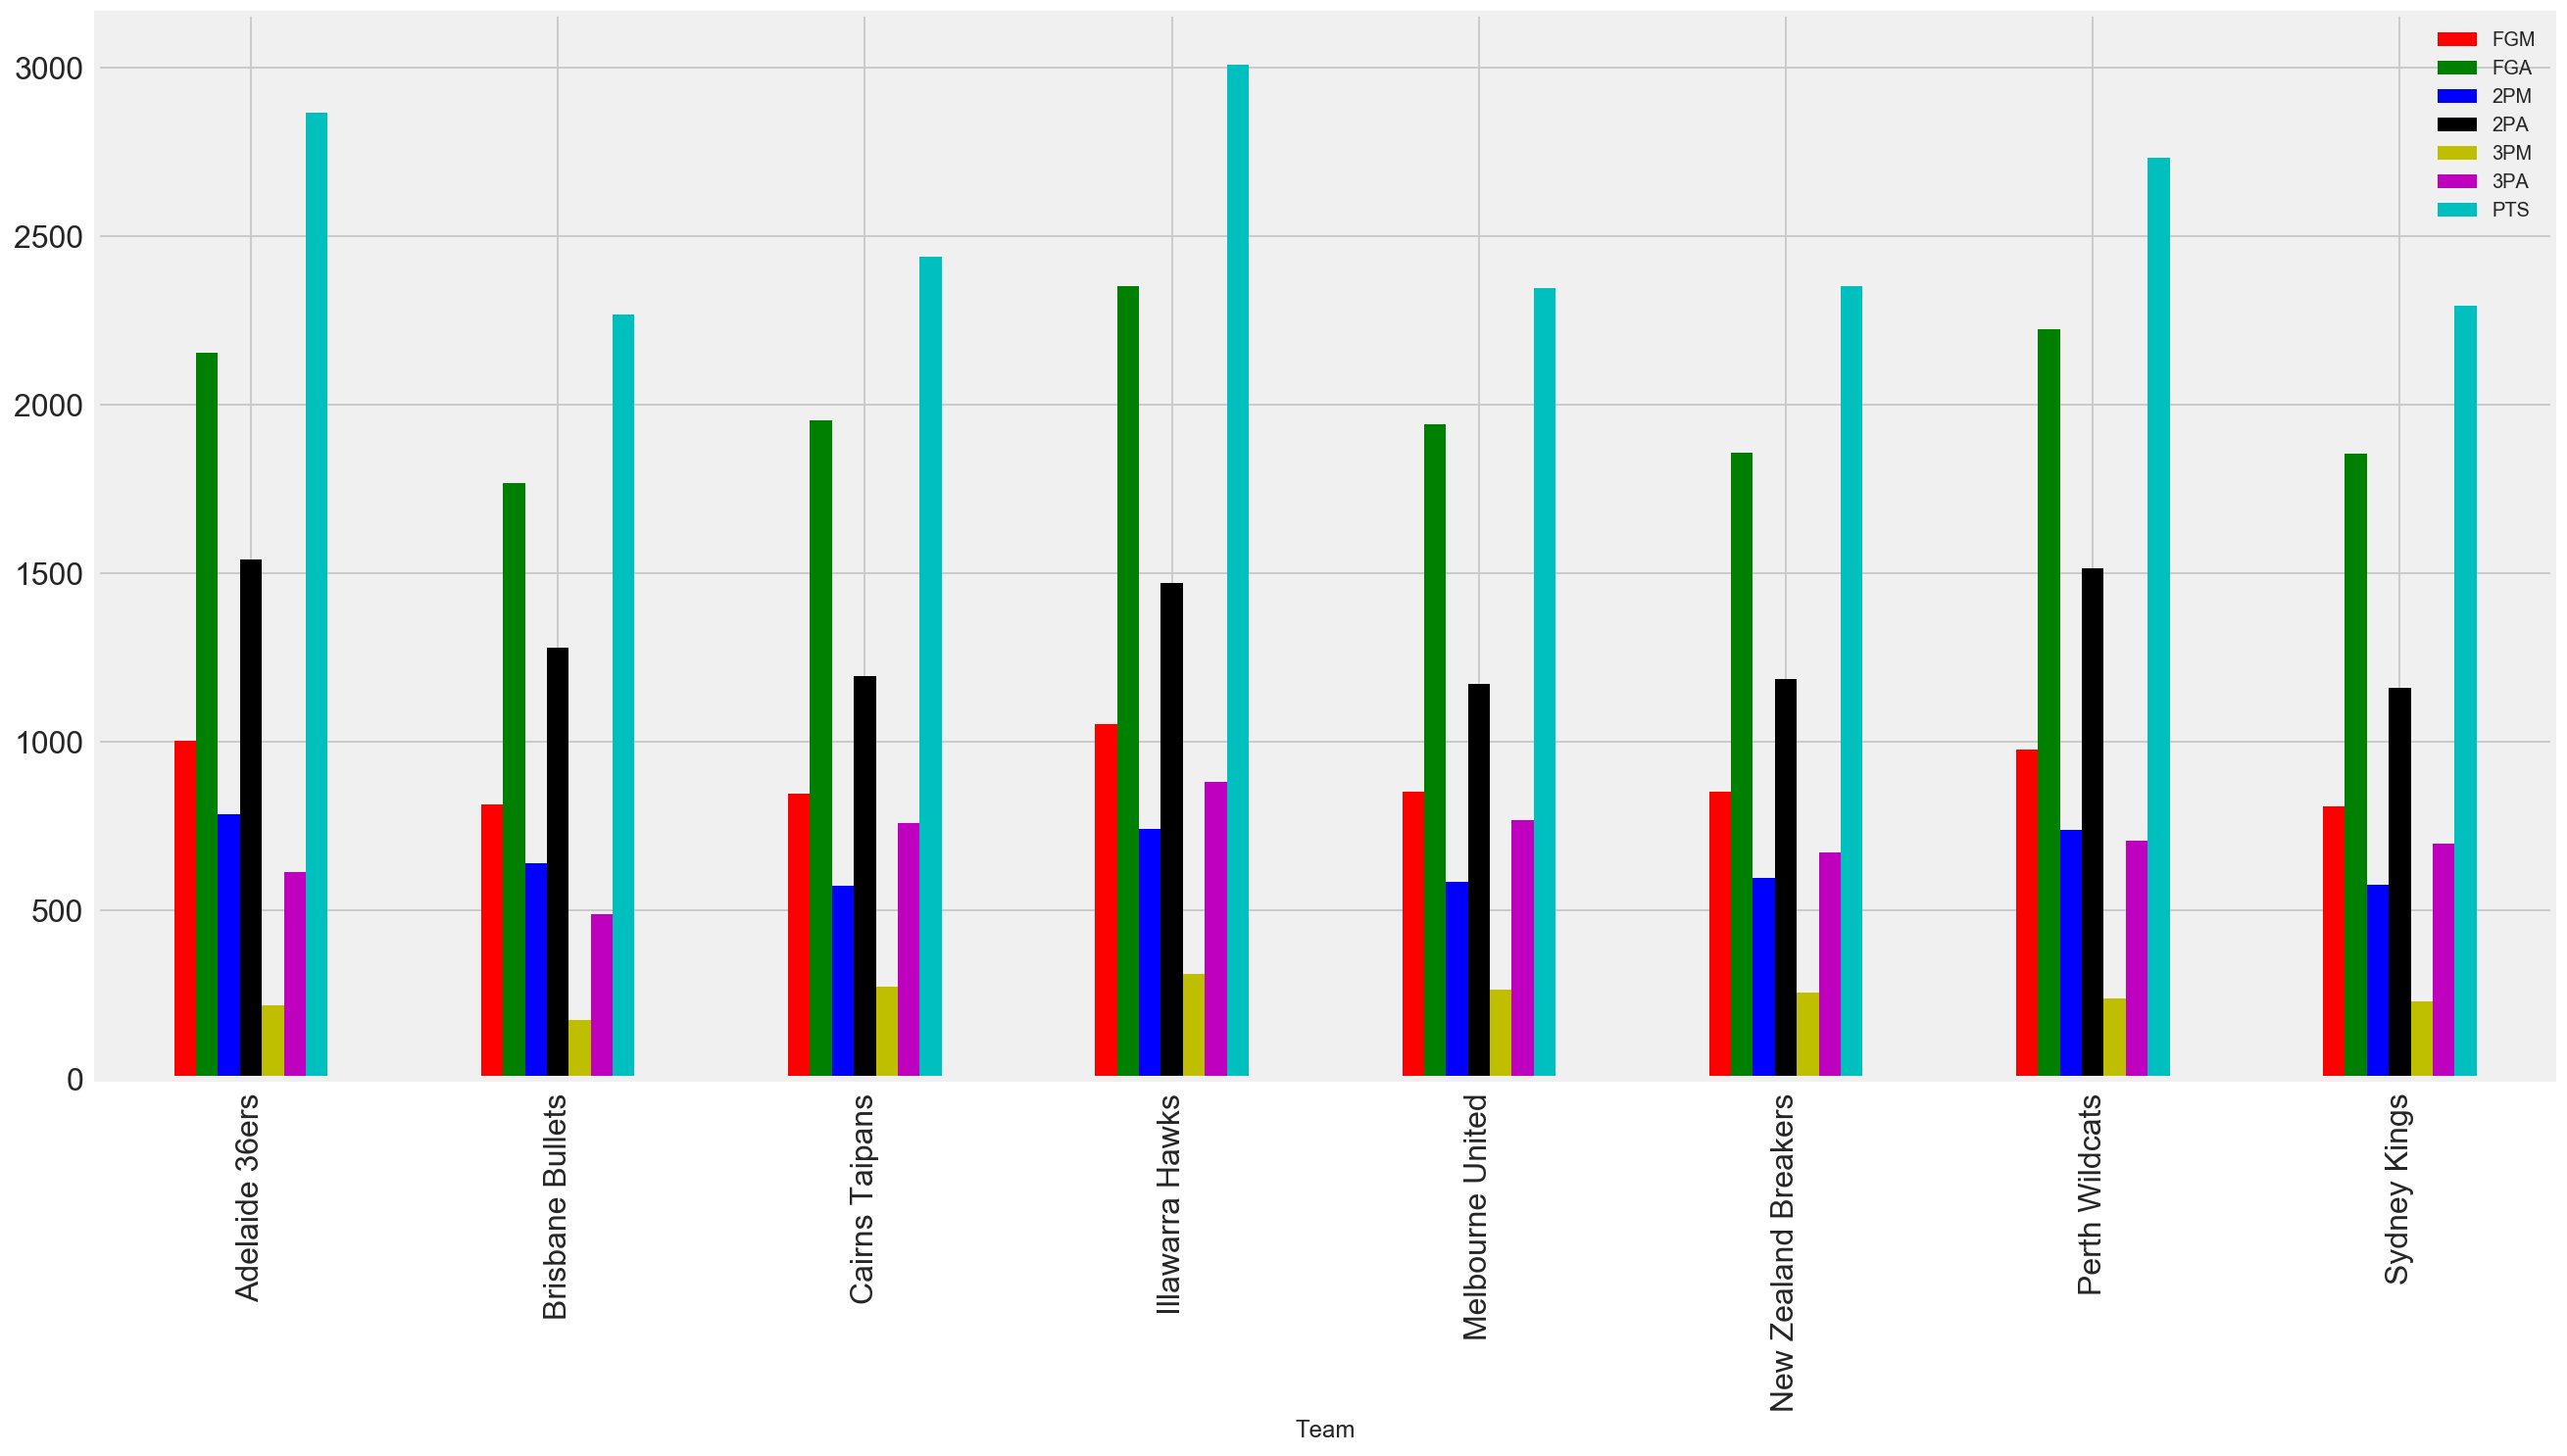

In [36]:
#More Graphs
Counting_Stats = totals_team[['FGM', 'FGA', '2PM', '2PA', '3PM', '3PA', 'PTS']]
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
mycolors = 'rgbkymc' 
Counting_Stats.plot.bar(figsize=(20, 10), color = mycolors)

I wanted to create effective field goal percentage per team for the entire season.  Therefore, I could see if teams shot better or worse agains the Kings using this number.   I am debating potentially using as a threshhold for a classification regression based on this variable.  However, I can't really figure out how I want to tackle that yet.  That said, it seems like this data is good to have going forward.

### Part 2:
#### Discussion:
I am going to load my dataframe from Pt. 2 of capstone, which I exported to csv at the end of Pt. 2.  This is the dataframe with all my defensive shot data for the Kings. I will then set some 'X's', standardize them, look for correlation, run a regression model with result as my target. 

In [37]:
#read in CSV, maintain index, right now the data is sorted by distance. 
kings = pd.read_csv('/Users/ericnesi/Desktop/capstone-eric-pub/datasets/kings_df.csv', index_col=[0])

In [38]:
kings.head()

,GMID,Team,teamScore,opponent,opponentScore,Player,PlayerNo,X,Y,ShotType,SubType,Result,Quarter,3PM,distance_m,Court_Loc
1310,10,Brisbane Bullets,77,Sydney Kings,73,T. Craig,2,21.898,23.549,2pt,jumpshot,0,1,0,6.068243,Right_Wing
1311,10,Brisbane Bullets,77,Sydney Kings,73,T. Craig,2,16.423,48.464,2pt,jumpshot,0,1,0,3.067106,In_the_Paint
1312,10,Brisbane Bullets,77,Sydney Kings,73,D. Kickert,14,31.934,30.034,3pt,three,0,1,0,7.984480,Right_Wing_3pt
1313,10,Brisbane Bullets,77,Sydney Kings,73,J. Beal,0,28.467,72.696,3pt,three,0,1,0,7.276305,Left_Wing_3pt
1314,10,Brisbane Bullets,77,Sydney Kings,73,D. Kickert,14,13.139,38.567,2pt,jumpshot,1,1,0,2.741538,In_the_Paint


In [40]:
#reset index
kings.index = range(0,len(kings))

In [41]:
kings.loc[kings['SubType']== 'three']

,GMID,Team,teamScore,opponent,opponentScore,Player,PlayerNo,X,Y,ShotType,SubType,Result,Quarter,3PM,distance_m,Court_Loc
2,10,Brisbane Bullets,77,Sydney Kings,73,D. Kickert,14,31.934,30.034,3pt,three,0,1,0,7.984480,Right_Wing_3pt
3,10,Brisbane Bullets,77,Sydney Kings,73,J. Beal,0,28.467,72.696,3pt,three,0,1,0,7.276305,Left_Wing_3pt
6,10,Brisbane Bullets,77,Sydney Kings,73,D. Kickert,14,28.285,77.133,3pt,three,1,1,1,7.567453,Left_Wing_3pt
7,10,Brisbane Bullets,77,Sydney Kings,73,A. Gibson,1,31.022,65.870,3pt,three,0,1,0,7.532223,Top_of_Key_3pt
22,10,Brisbane Bullets,77,Sydney Kings,73,T. Craig,2,25.365,84.300,3pt,three,0,2,0,7.576879,Left_Wing_3pt
27,10,Brisbane Bullets,77,Sydney Kings,73,A. Petrie,17,28.102,20.478,3pt,three,0,2,0,7.724022,Right_Wing_3pt
29,10,Brisbane Bullets,77,Sydney Kings,73,A. Gibson,1,32.664,32.765,3pt,three,0,2,0,8.033277,Right_Wing_3pt
36,10,Brisbane Bullets,77,Sydney Kings,73,M. Kenyon,4,24.453,93.515,3pt,three,0,3,0,8.412345,Left_Wing_3pt
45,10,Brisbane Bullets,77,Sydney Kings,73,A. Gibson,1,19.161,93.174,3pt,three,1,4,1,7.521377,Left_Wing_3pt
46,10,Brisbane Bullets,77,Sydney Kings,73,J. Beal,0,9.124,2.730,3pt,three,1,4,1,7.162740,Right_Corner_3pt


#### Discussion:
Create X's based on Court_Loc, Quarter, Distance to test models with whether a shot went in or not as my Y. 

In [42]:
#Set my X_features and append to dataframe
X_features = kings[['Court_Loc','Quarter']]
X_features = pd.concat([pd.get_dummies(X_features[col]) for col in X_features], axis=1)
X_features['distance_m'] = kings['distance_m']

In [43]:
X_features.head()

,Backcourt,In_the_Paint,Left_Corner,Left_Corner_3pt,Left_Wing,Left_Wing_3pt,Restricted_Area,Right_Corner,Right_Corner_3pt,Right_Wing,Right_Wing_3pt,Top_of_Key,Top_of_Key_3pt,1,2,3,4,distance_m
0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,6.068243
1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3.067106
2,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,7.984480
3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,7.276305
4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.741538


#### **Random Forest:**

In [44]:
# Below code from Build A Random Forest from Scratch authored by Kiefer Katovich (SF) of General Assembly

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

Xs = ss.fit_transform(X_features)

Y = kings['Result']

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Xtrain, Xtest, ytrain, ytest = train_test_split(Xs, Y, test_size=0.33)

dtc = DecisionTreeClassifier(max_depth=None, max_features='auto')
dtc.fit(Xtrain, ytrain)
print ('dtc acc:', dtc.score(Xtest, ytest))

rf = RandomForestClassifier(n_estimators=1000, max_depth=None, max_features='auto')
rf.fit(Xtrain, ytrain)
yhat = rf.predict(Xtest)
print ('rf acc:', accuracy_score(ytest, yhat))


dtc acc: 0.534686971235
rf acc: 0.539763113367


I realized predicting whether or not a shot is going to be made is potentially not a great option, but while I am doing it, I decided to try logistic regression to see if I could improve accuracy.  Not a great prediction score by RF/DTC.

#### **Logistic Regression:**

In [49]:
# Code below from:
# "Introduction to Gridsearching Hyperparameters" authored by Kiefer Katovich (SF) & David Yerrington (SF) of General Assembly
# "Practice Gridsearch and Multinomial Models with SF Crime Data" authored by Joseph Nelson (SF) of General Assembly

# Set parameters for gridsearching
gs_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.logspace(-5,0,100)
}

lr_gridsearch = GridSearchCV(LogisticRegression(), gs_params, cv=5, verbose=1)
print (lr_gridsearch)


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'solver': ['liblinear'], 'C': array([  1.00000e-05,   1.12332e-05, ...,   8.90215e-01,   1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)


In [50]:
# TTS our data.
# We will have a holdout set to test on at the end.
X_train, X_test, y_train, y_test = train_test_split(Xs, Y, test_size=0.3, random_state=12)

In [51]:
lr_gridsearch.fit(X_train, y_train)

print (lr_gridsearch.best_score_)
print (lr_gridsearch.best_params_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
0.643769968051
{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.1s finished


In [52]:
bestfit = {'C': 1.0, 'penalty':'l1', 'solver': 'liblinear'}

logreg = LogisticRegression(C=1.0, penalty='l1', solver='liblinear')

logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
Y_pred = logreg.predict(X_test)

# stores confusion matrix for Y Test and Y Pred  
conmat = confusion_matrix(y_test, Y_pred, labels=logreg.classes_)
# converts np.matrix format matrix to a dataframe and adds index and column names
conmat = pd.DataFrame(conmat, columns=logreg.classes_, index=logreg.classes_)

print ('best params for Result:')
print (conmat)

best params for Result:
     0   1
0  233  56
1  151  97


In [54]:
print(classification_report(y_test, Y_pred))

             precision    recall  f1-score   support

          0       0.61      0.81      0.69       289
          1       0.63      0.39      0.48       248

avg / total       0.62      0.61      0.60       537



In [55]:
best_lr = lr_gridsearch.best_estimator_

print (best_lr.score(Xs, Y))


0.632755729458


In [56]:
coef_df = pd.DataFrame({
        'coef':best_lr.coef_[0],
        'feature':X_features.columns
    })


coef_df['abs_coef'] = np.abs(coef_df.coef)

# sort by absolute value of coefficient (magnitude)
coef_df.sort_values('abs_coef', ascending=False, inplace=True)

coef_df.head(12)

,coef,feature,abs_coef
17,-0.935662,distance_m,0.935662
1,-0.393790,In_the_Paint,0.393790
10,0.251964,Right_Wing_3pt,0.251964
5,0.176759,Left_Wing_3pt,0.176759
2,-0.138427,Left_Corner,0.138427
15,-0.122398,3,0.122398
7,-0.110012,Right_Corner,0.110012
12,0.106314,Top_of_Key_3pt,0.106314
13,0.103387,1,0.103387
3,0.079026,Left_Corner_3pt,0.079026


#### Discussion:
This is not surprising that the closer to the basket you are the more likely you are to make the shot. That said, the prediction score isn't great.  Furthermore, it is really not what I am trying to accomplish with the project.

In [57]:
print(kings.shape)
print(kings.Court_Loc.unique())

(1789, 16)
['Right_Wing' 'In_the_Paint' 'Right_Wing_3pt' 'Left_Wing_3pt'
 'Top_of_Key_3pt' 'Restricted_Area' 'Right_Corner' 'Right_Corner_3pt'
 'Left_Wing' 'Top_of_Key' 'Left_Corner' 'Left_Corner_3pt' 'Backcourt']


In [58]:
print(np.sum(kings.Court_Loc =="Restricted_Area")/1781)
print(np.sum(kings.Court_Loc =='Left_Wing_3pt')/1781)
print(np.sum(kings.Court_Loc =='Right_Wing_3pt')/1781)
print(np.sum(kings.Court_Loc =='Top_of_Key_3pt')/1781)
print(np.sum(kings.Court_Loc =='Left_Corner_3pt')/1781)
print(np.sum(kings.Court_Loc =='Right_Corner_3pt')/1781)
print(np.sum(kings.Court_Loc =='Top_of_Key')/1781)
print(np.sum(kings.Court_Loc =='Left_Wing')/1781)
print(np.sum(kings.Court_Loc =='Right_Corner')/1781)
print(np.sum(kings.Court_Loc =='Left_Corner')/1781)
print(np.sum(kings.Court_Loc =='In_the_Paint')/1781)

0.21392476137
0.116226838855
0.110612015722
0.0606400898372
0.0162829870859
0.0151600224593
0.0224592925323
0.0331274564851
0.0252667040988
0.0230207748456
0.331274564851


## End Part3 Notebook